
    # SGEMM Product Performance Prediction
    
    **Author:** [Pratyush Tiwary]
    
    ## Introduction
    
    In this project, we analyze and predict the average run times of SGEMM operations. The dataset contains various features that influence performance, and our goal is to build machine learning models to predict the average run time based on these features.
    
    ## Steps Involved:
    - Data Preprocessing
    - Exploratory Data Analysis (EDA)
    - Model Implementation and Evaluation
    - Summary and Conclusion
    

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the dataset
dataset_path = 'sgemm_product.csv'
df = pd.read_csv(dataset_path)


    ## Data Preprocessing
    
    In this section, we load the dataset, clean it by handling missing values and duplicates, and prepare the data for analysis. We also compute the average run time across the four provided runs and drop the individual run columns.
    

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

df = df.dropna()

df['Average_Run'] = df[['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)']].mean(axis=1)

# drop the individual run columns as they are no longer needed
df.drop(['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)'], axis=1, inplace=True)

# Drop duplicates if any
df = df.drop_duplicates()

# Quick overview of the cleaned data
print("Cleaned dataset overview:")
print(df.describe())

# Final structure
print("Final DataFrame structure:")
print(df.info())


Missing values in each column:
 MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        0
KWI          0
VWM          0
VWN          0
STRM         0
STRN         0
SA           0
SB           0
Run1 (ms)    0
Run2 (ms)    0
Run3 (ms)    0
Run4 (ms)    0
dtype: int64
Cleaned dataset overview:
                 MWG            NWG            KWG          MDIMC  \
count  241600.000000  241600.000000  241600.000000  241600.000000   
mean       80.415364      80.415364      25.513113      13.935894   
std        42.469220      42.469220       7.855619       7.873662   
min        16.000000      16.000000      16.000000       8.000000   
25%        32.000000      32.000000      16.000000       8.000000   
50%        64.000000      64.000000      32.000000       8.000000   
75%       128.000000     128.000000      32.000000      16.000000   
max       128.000000     128.000000      32.000000      32.000000   

               NDIMC          MDIMA  

                 MWG            NWG            KWG          MDIMC  \
count  241600.000000  241600.000000  241600.000000  241600.000000   
mean       80.415364      80.415364      25.513113      13.935894   
std        42.469220      42.469220       7.855619       7.873662   
min        16.000000      16.000000      16.000000       8.000000   
25%        32.000000      32.000000      16.000000       8.000000   
50%        64.000000      64.000000      32.000000       8.000000   
75%       128.000000     128.000000      32.000000      16.000000   
max       128.000000     128.000000      32.000000      32.000000   

               NDIMC          MDIMA          NDIMB            KWI  \
count  241600.000000  241600.000000  241600.000000  241600.000000   
mean       13.935894      17.371126      17.371126       5.000000   
std         7.873662       9.389418       9.389418       3.000006   
min         8.000000       8.000000       8.000000       2.000000   
25%         8.000000       8.0000

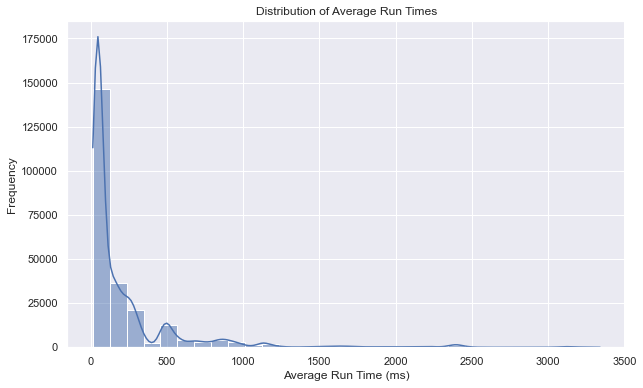

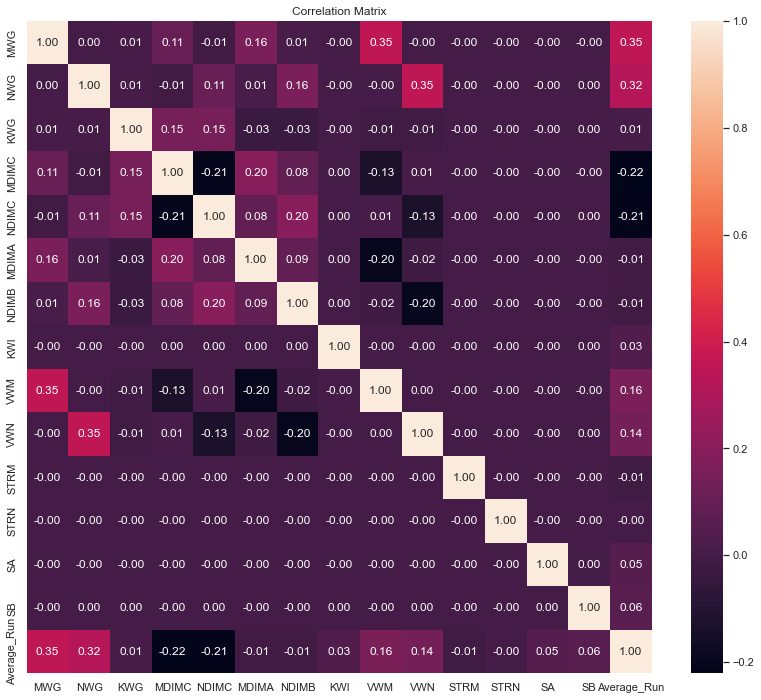

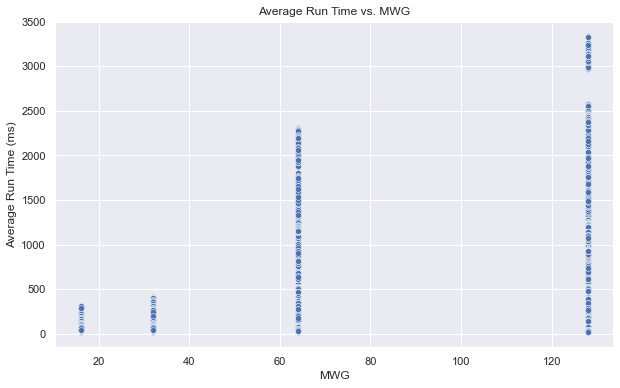

In [ ]:
# Setting aesthetic parameters in one step.
sns.set()

# Summary statistics
print(df.describe())

# Distribution of the average run times
plt.figure(figsize=(10, 6))
sns.histplot(df['Average_Run'], kde=True, bins=30)
plt.title('Distribution of Average Run Times')
plt.xlabel('Average Run Time (ms)')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(14, 12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Scatter plot for average run time vs. other features (Example: MWG)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MWG', y='Average_Run', data=df)
plt.xlabel('MWG')
plt.ylabel('Average Run Time (ms)')
plt.title('Average Run Time vs. MWG')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


    ## Exploratory Data Analysis (EDA)
    
    Here, we perform EDA to understand the distribution of the average run times and the correlations between different features. Visualizations such as histograms, scatter plots, and correlation matrices help in gaining insights into the data.
    

In [ ]:
# Prepare the features and target variable
X = df.drop('Average_Run', axis=1)
y = df['Average_Run']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
# Initializing models
linear_regressor = LinearRegression()
decision_tree_regressor = DecisionTreeRegressor(random_state=42)
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    y_true = np.where(y_true == 0, np.finfo(float).eps, y_true) 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Linear Regression:
 RMSE: 283.12
 R^2: 0.40

MAPE: 1.4824799247869331


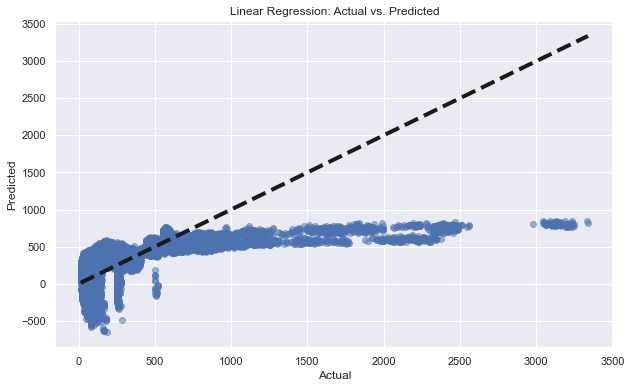

In [ ]:
# Linear Regression
linear_regressor.fit(X_train_scaled, y_train)
y_pred_linear = linear_regressor.predict(X_test_scaled)

# Evaluation
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)
mse = mean_squared_error(y_true, y_pred_linear)

print(f"Linear Regression:\n RMSE: {rmse_linear:.2f}\n R^2: {r2_linear:.2f}\n")
print("Mean Squared Error (MSE):", mse)


# Plot for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()



Decision Tree Regressor:
 RMSE: 4.18
 R^2: 1.00

MAPE: 1.4824799247869331


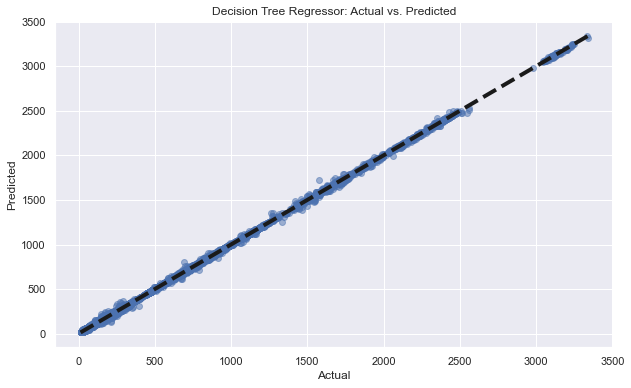

In [ ]:
# Decision Tree Regressor
decision_tree_regressor.fit(X_train, y_train)
y_pred_dt = decision_tree_regressor.predict(X_test)

# Evaluation
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)
mse = mean_squared_error(y_true, y_pred_dt)

print(f"Decision Tree Regressor:\n RMSE: {rmse_dt:.2f}\n R^2: {r2_dt:.2f}\n")
print("Mean Squared Error (MSE):", mse)


# Plot for Decision Tree Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree Regressor: Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()



Random Forest Regressor:
 RMSE: 3.75
 R^2: 1.00

MAPE: 1.4824799247869331


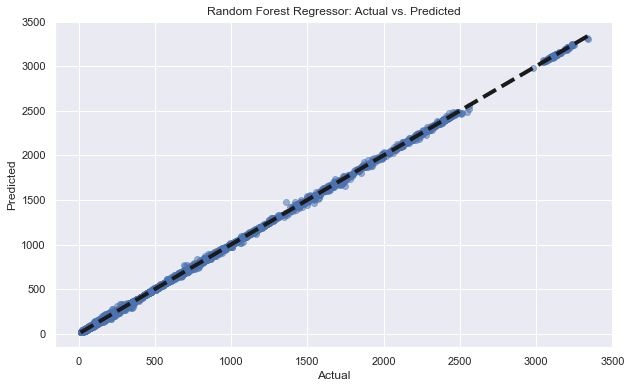

In [ ]:
# Random Forest Regressor
random_forest_regressor.fit(X_train, y_train)
y_pred_rf = random_forest_regressor.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mse = mean_squared_error(y_true, y_pred_rf)
print(f"Random Forest Regressor:\n RMSE: {rmse_rf:.2f}\n R^2: {r2_rf:.2f}\n")
print("Mean Squared Error (MSE):", mse)

# Plot for Random Forest Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regressor: Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()



In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Define the method of cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(random_forest_regressor, X, y, cv=kfold, scoring='neg_mean_squared_error')

# Output the results
print("MSE scores for each fold are:", -scores)
print("Average MSE across all folds:", np.mean(-scores))



    ## Model Implementation and Evaluation
    
    In this section, we implement three machine learning models: Linear Regression, Decision Tree Regressor, and Random Forest Regressor. We evaluate the performance of each model using metrics like RMSE, R², and MAE.
    


    ## Summary and Conclusion
    
    Based on the evaluations, the Random Forest Regressor performed the best with the lowest RMSE and highest R² score. This section summarizes the findings and discusses potential areas for further improvement.
    